<a href="https://colab.research.google.com/github/KaptainK1/ClassificationOn1994CensusData/blob/master/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# import libraries 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
print(sklearn.__version__)

0.22.2.post1


In [3]:
#create the header list as our data does not include headers
header_list = ['Age', 'Workclass', 'Education', 'Martial-Status', 'Occupation',
              'Relationship', 'Race', 'Sex','Captial-Gain', 'Captial-Loss',
              'Hours-Per-Week', 'Native-Country', 'Income-Range']

print(header_list)

# import the training data and parse ? values to be NaN
training_data_without_headers = pd.read_csv('adult_train.txt', na_values=' ?')

# converting data frame to csv
training_data_without_headers.to_csv("adult_train_with_headers.csv", header=header_list, index=False)
  
# create the new file with attached headers
training_data = pd.read_csv("adult_train_with_headers.csv")

# create the test data
test_data = pd.read_csv('adult_test.txt')


['Age', 'Workclass', 'Education', 'Martial-Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Captial-Gain', 'Captial-Loss', 'Hours-Per-Week', 'Native-Country', 'Income-Range']


In [43]:
# check for is na
training_data.isna().sum()

Age                              0
Captial-Gain                     0
Captial-Loss                     0
Hours-Per-Week                   0
Workclass_ Federal-gov           0
                                ..
Native-Country_ United-States    0
Native-Country_ Vietnam          0
Native-Country_ Yugoslavia       0
Income-Range_ <=50K              0
Income-Range_ >50K               0
Length: 105, dtype: int64

In [5]:
# For categorical values, you can substitute with the mode value
training_data['Workclass'].fillna(training_data['Workclass'].mode(),inplace=True)
training_data['Occupation'].fillna(training_data['Occupation'].mode(),inplace=True)
training_data['Native-Country'].fillna(training_data['Native-Country'].mode(),inplace=True)

In [6]:
#start of step 2, convert features into dummy numerical values instead of named categories
pd.get_dummies(training_data).to_csv('training_data_with_dummy_values.csv', index=False)
pd.get_dummies(test_data).to_csv('test_data_with_dummy_values.csv', index=False)


In [44]:
# set our training data to the result of the get dummies pandas function
training_data = pd.read_csv('training_data_with_dummy_values.csv')

print(type(training_data))

#set our data to be all of the attributes except the target
data = training_data.drop(["Income-Range_ >50K", "Income-Range_ <=50K"], axis=1)
print(data)

# pick our output target (ie what do we want to try and predict)
# to be Income-Range_ >50K column
target = training_data["Income-Range_ >50K"]

print(target)

# Randomly split the dataset into train and test set 
train_set, test_set, train_label, test_label = train_test_split(
    data,
    target,
    train_size = 0.70,
    random_state = 5,
    shuffle = True
)

# Verify the split is done right 
print(train_set.shape, test_set.shape)

<class 'pandas.core.frame.DataFrame'>
       Age  Captial-Gain  ...  Native-Country_ Vietnam  Native-Country_ Yugoslavia
0       50             0  ...                        0                           0
1       38             0  ...                        0                           0
2       53             0  ...                        0                           0
3       28             0  ...                        0                           0
4       37             0  ...                        0                           0
...    ...           ...  ...                      ...                         ...
32555   27             0  ...                        0                           0
32556   40             0  ...                        0                           0
32557   58             0  ...                        0                           0
32558   22             0  ...                        0                           0
32559   52         15024  ...                    

In [45]:
# Create a Decision Tree Classifier 
classifier = DecisionTreeClassifier()

# training a decision tree 
classifier.fit(train_set, train_label)

# predictions = classifier.predict(test_set)
# print the result of prediction 
print(classifier.score(test_set, test_label))



0.8151105651105651


In [199]:
# Visualize the tree 
# from sklearn import tree
# tree.plot_tree(classifier)

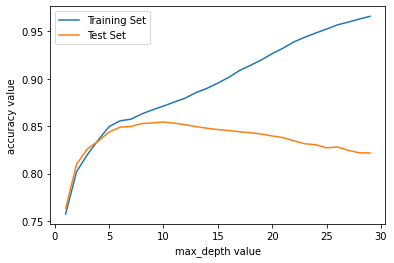

In [46]:
#Step 3 part 1 for setting the max_depth

#array to hold the training accuracy results
training_accuracy = []

#array to hold the test accuracy results
test_accuracy = []

#array to hold our x-axis values, necessary for plotting on the graph
x_axis = []

#loop 30 times, each time testing a new increment for max_depth
for x in range(1,30):
  x_axis.append(x)

  #create the max depth decision tree
  maxDepthTree = DecisionTreeClassifier(max_depth=x)

  #fit to our training model
  maxDepthTree.fit(train_set, train_label)

  #set the test results based on score, then append to our test accuracy array
  test_results = maxDepthTree.score(test_set, test_label)
  test_accuracy.append(test_results)

  #set the training results based on score, then append to our training accuracy array
  training_results = maxDepthTree.score(train_set, train_label)
  training_accuracy.append(training_results)

#now we need to plot our data using matplotlib.pyplot
#plot the first line which is our training accuracy
plt.plot(x_axis,training_accuracy, label='Training Set')

#plot the second line which is our training accuracy
plt.plot(x_axis,test_accuracy, label='Test Set')

#set the x and y labels
plt.xlabel('max_depth value')
plt.ylabel('accuracy value')
plt.legend()

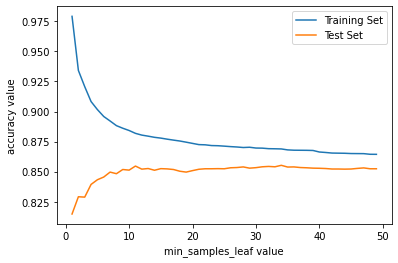

In [47]:
#Step 3 part 2 for setting the min_samples_leaf

#array to hold the training accuracy results
training_accuracy = []

#array to hold the test accuracy results
test_accuracy = []

#array to hold our x-axis values, necessary for plotting on the graph
x_axis = []

#loop 30 times, each time testing a new increment for max_depth
for x in range(1,50):
  x_axis.append(x)

  #create the max depth decision tree
  maxDepthTree = DecisionTreeClassifier(min_samples_leaf=x)

  #fit to our training model
  maxDepthTree.fit(train_set, train_label)

  #set the test results based on score, then append to our test accuracy array
  test_results = maxDepthTree.score(test_set, test_label)
  test_accuracy.append(test_results)

  #set the training results based on score, then append to our training accuracy array
  training_results = maxDepthTree.score(train_set, train_label)
  training_accuracy.append(training_results)

#now we need to plot our data using matplotlib.pyplot
#plot the first line which is our training accuracy
plt.plot(x_axis,training_accuracy, label='Training Set')

#plot the second line which is our training accuracy
plt.plot(x_axis,test_accuracy, label='Test Set')

#set the x and y labels
plt.xlabel('min_samples_leaf value')
plt.ylabel('accuracy value')
plt.legend()

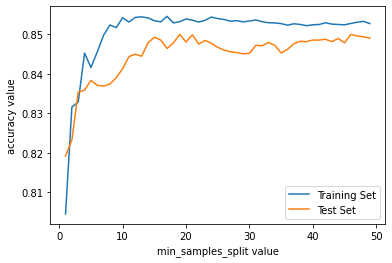

In [58]:
# step 4 using a random forest

random_forest_train_results = []
random_forest_test_results = []
x_axis = []

#use a for loop to loop over 50 iterations testing the n_estimators parameter
# set the max_depth to 8 and min_samples_leaf to 24 from what we found in earlier
# testing with the DecisionTreeClassifier
for x in range(1,50):
  x_axis.append(x)
  random_forest = RandomForestClassifier(n_estimators=x, max_depth=8,
                             min_samples_split=2, min_samples_leaf=24, random_state=0)
  
  # fit and get the results for our training data. Finally add it to our
  # random_forest_results list
  random_forest.fit(train_set, train_label)
  random_forest_results = random_forest.score(train_set, train_label)
  random_forest_train_results.append(random_forest_results)

  # fit and get the results for our test data. Finally add it to our
  # random_forest_results list
  random_forest.fit(test_set, test_label)
  random_forest_results = random_forest.score(test_set, test_label)
  random_forest_test_results.append(random_forest_results)


#now we need to plot our data using matplotlib.pyplot
#plot the first line which is our training accuracy
plt.plot(x_axis,random_forest_train_results, label='Training Set')

#plot the second line which is our training accuracy
plt.plot(x_axis,random_forest_test_results, label='Test Set')

#set the x and y labels
plt.xlabel('min_samples_split value')
plt.ylabel('accuracy value')
plt.legend()

In [49]:
#step 5 Accuracy - evaluation with best RandomTree and DecisionClassiferies

random_forest = RandomForestClassifier(n_estimators=18, max_depth=8,
                             min_samples_split=2, min_samples_leaf=24, random_state=0)

decision_tree = DecisionTreeClassifier(min_samples_leaf=24, max_depth=8)

random_forest.fit(train_set, train_label)
random_forest_prediction = random_forest.predict(test_set)
print(random_forest_prediction)
random_forest_score = random_forest.score(test_set, test_label)
print(f'The accuracy of the random forest on the training set is {random_forest_score}')

decision_tree.fit(train_set, train_label)
decision_tree_prediction = decision_tree.predict(test_set)
print(decision_tree_prediction)
decision_tree_score = decision_tree.score(test_set, test_label)
print(f'The accuracy of the decision tree on the training set is {decision_tree_score}')




[0 0 1 ... 0 0 0]
The accuracy of the random forest on the training set is 0.8508394758394758
[0 0 1 ... 0 0 0]
The accuracy of the decision tree on the training set is 0.8520679770679771


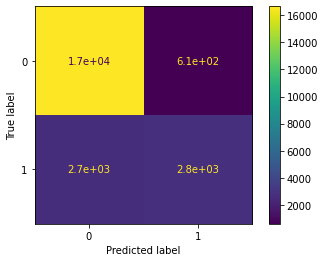

In [50]:
#step 5 Confusion Matrix - evaluation with best RandomTree

confusion_matrix(test_label,random_forest_prediction)
plot_confusion_matrix(random_forest, train_set,train_label)


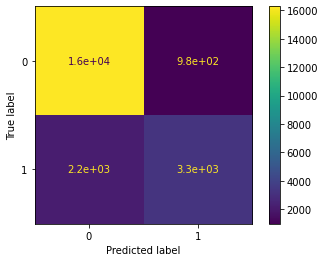

In [51]:
#step 5 Confusion Matrix - evaluation with best DecisionClassiferies
confusion_matrix(test_label,decision_tree_prediction)
plot_confusion_matrix(decision_tree, train_set,train_label)

In [52]:
#Step 5 recall scores

#random forest predictions against the test set labels
print(recall_score(test_label, random_forest_prediction, average='macro'))
print(recall_score(test_label, random_forest_prediction, average='micro'))

#decision tree predictions against the test set labels
print(recall_score(test_label, decision_tree_prediction, average='macro'))
print(recall_score(test_label, decision_tree_prediction, average='micro'))

0.7245928130151329
0.8508394758394758
0.754492097583795
0.8520679770679771


In [57]:
#Step 5 precision scores

#random forest predictions against the test set labels
print(precision_score(test_label, random_forest_prediction, average='macro'))
print(precision_score(test_label, random_forest_prediction, average='micro'))
print(precision_score(test_label, random_forest_prediction, average='weighted'))
print()
#decision tree predictions against the test set labels
print(precision_score(test_label, decision_tree_prediction, average='macro'))
print(precision_score(test_label, decision_tree_prediction, average='micro'))
print(precision_score(test_label, decision_tree_prediction, average='weighted'))

0.8330560154818547
0.8508394758394758
0.8461355293622669

0.8105778675772789
0.8520679770679771
0.8447915776157771
